## Final Project Submission

Please fill out:
* Student name: Mitchelle Mkan
* Student pace: Part time 
* Scheduled project review date/time: 
* Instructor name: Christine Kirimi
* Blog post URL:


This is to load and inspect the data

In [4]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd

# Load dataset
df = pd.read_csv('Aviation_Data.csv')

# Initial data inspection
df.info()
df.head()


C:\Users\Admin\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


# Cleaning and Preparing our Data

We are now cleaning the column names in the data


In [5]:
# Create a copy to preserve original
df_clean = df.copy()

# Standardize column names: lowercase, replace spaces/dots with underscores
df_clean.columns = df_clean.columns.str.strip().str.replace('.', '_', regex=False).str.replace(' ', '_').str.lower()


We are converting the latitudes and longtitudes to numeric, if they are included in our data.

In [6]:
# Convert Latitude and Longitude to numeric if included
df_clean['latitude'] = pd.to_numeric(df_clean.get('latitude'), errors='coerce')
df_clean['longitude'] = pd.to_numeric(df_clean.get('longitude'), errors='coerce')


We will now remove the duplicates in our Aviation data. This is still part of Data cleaning.

In [7]:
# Drop duplicate rows
df_clean.drop_duplicates(inplace=True)


# Handling Missing Values

Drop the missing values

In [8]:
# Show percentage of missing values
null_percentages = df_clean.isnull().mean().sort_values(ascending=False)

# Drop columns with more than 50% missing data
cols_to_drop = null_percentages[null_percentages > 0.5].index.tolist()
df_clean.drop(columns=cols_to_drop, inplace=True)

# Review updated shape and columns
print("Shape after cleaning:", df_clean.shape)
print("Remaining columns:", df_clean.columns.tolist())


Shape after cleaning: (88958, 25)
Remaining columns: ['event_id', 'investigation_type', 'accident_number', 'event_date', 'location', 'country', 'airport_code', 'airport_name', 'injury_severity', 'aircraft_damage', 'registration_number', 'make', 'model', 'amateur_built', 'number_of_engines', 'engine_type', 'purpose_of_flight', 'total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries', 'total_uninjured', 'weather_condition', 'broad_phase_of_flight', 'report_status', 'publication_date']


We will input the missing numeric columns with the median.

In [9]:
num_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns

for col in num_cols:
    if df_clean[col].isnull().sum() > 0:
        median_val = df_clean[col].median()
        df_clean[col].fillna(median_val, inplace=True)


While categorical columns are filled with Mode

In [10]:
cat_cols = df_clean.select_dtypes(include='object').columns

for col in cat_cols:
    if df_clean[col].isnull().sum() > 0:
        mode_val = df_clean[col].mode()[0]
        df_clean[col].fillna(mode_val, inplace=True)


We will now save the cleaned dataset. (This is for Tableau and further analysis)

In [11]:
# Save cleaned data to a new CSV file
df_clean.to_csv('Cleaned_Aviation_Data.csv', index=False)


# Aircraft Risk Analysis

Here are the top aircraft models, analysed by number of accidents

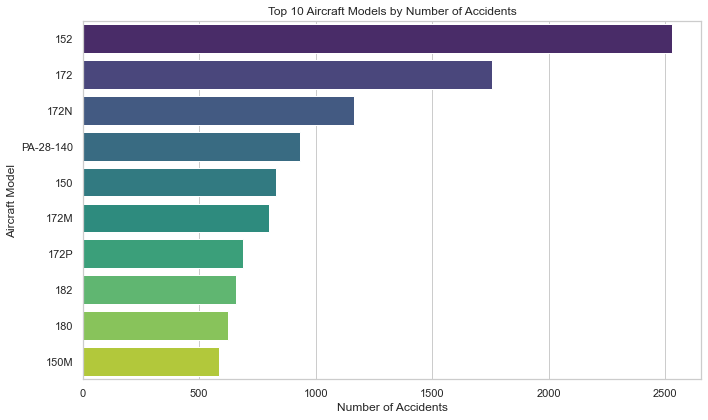

In [12]:
# Top 10 Aircraft Models by Total Number of Accidents
top_models = df_clean['model'].value_counts().head(10)

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=top_models.values, y=top_models.index, palette='viridis')
plt.title("Top 10 Aircraft Models by Number of Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Aircraft Model")
plt.tight_layout()
plt.show()


Average fatalities by aircraft model

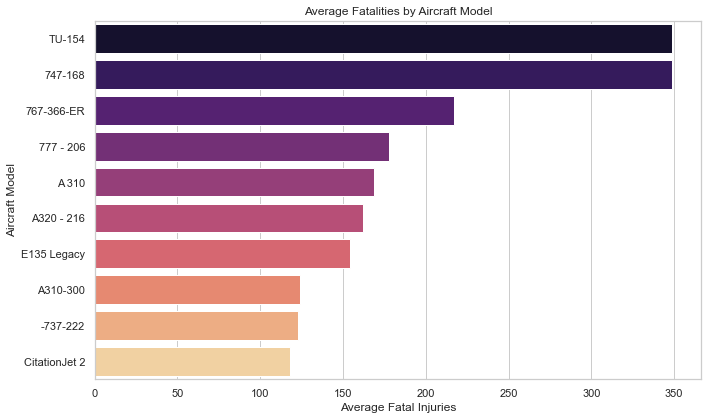

In [13]:
# Average Fatal Injuries by Aircraft Model (Top 10 by fatalities)
fatal_by_model = df_clean.groupby('model')['total_fatal_injuries'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=fatal_by_model.values, y=fatal_by_model.index, palette='magma')
plt.title("Average Fatalities by Aircraft Model")
plt.xlabel("Average Fatal Injuries")
plt.ylabel("Aircraft Model")
plt.tight_layout()
plt.show()


Aircraft damage level distribution

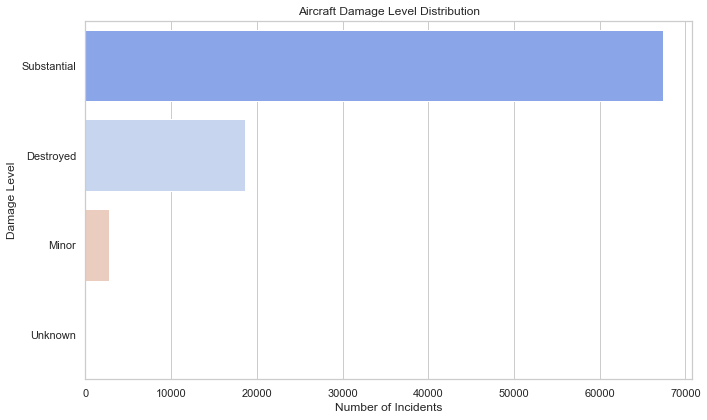

In [14]:
# Damage Level Counts (e.g., Substantial, Destroyed, Minor)
plt.figure(figsize=(10, 6))
sns.countplot(y='aircraft_damage', data=df_clean,
              order=df_clean['aircraft_damage'].value_counts().index,
              palette='coolwarm')
plt.title("Aircraft Damage Level Distribution")
plt.xlabel("Number of Incidents")
plt.ylabel("Damage Level")
plt.tight_layout()
plt.show()


Accidents by Phase of flights

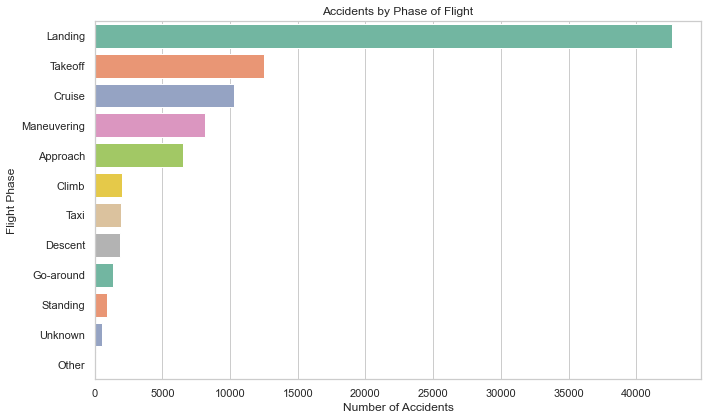

In [18]:
# Distribution of Accidents by Broad Phase of Flight (e.g., Takeoff, Landing)
plt.figure(figsize=(10, 6))
sns.countplot(y='broad_phase_of_flight', data=df_clean,
              order=df_clean['broad_phase_of_flight'].value_counts().index,
              palette='Set2')
plt.title("Accidents by Phase of Flight")
plt.xlabel("Number of Accidents")
plt.ylabel("Flight Phase")
plt.tight_layout()
plt.show()


We will now export the cleaned data for use in Tableau. This will give use visualisations of the data.

In [19]:
# Save cleaned dataset for Tableau
df_clean.to_csv("Cleaned_Aviation_Data.csv", index=False)
print("✅ Cleaned dataset saved as 'Cleaned_Aviation_Data.csv'")


✅ Cleaned dataset saved as 'Cleaned_Aviation_Data.csv'
